<a href="https://colab.research.google.com/github/MuhammadHassan667410/Learning-Complete-Artificial-Intelligence/blob/main/Phase%202%20%3A%20Machine%20Learning/Supervised%20ML(Regression%20and%20Classification)/Support_vector_Machine_Model_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
data['target'] = iris.target

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data['flower_name'] = data.target.apply(lambda x: iris.target_names[x])

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
data0 = data[data.target==0]
data1 = data[data.target==1]
data2 = data[data.target==2]

In [ ]:
data0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


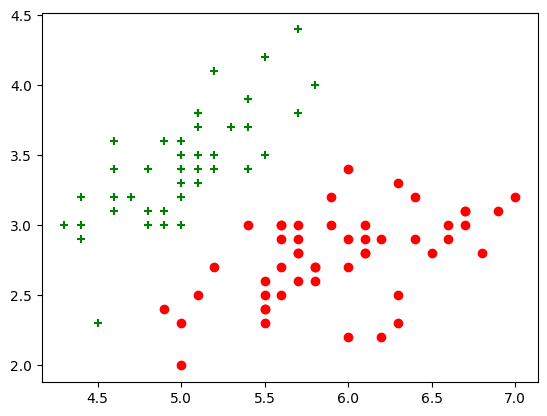

In [ ]:
plt.scatter(data0['sepal length (cm)'], data0['sepal width (cm)'], c='g', marker='+')
plt.scatter(data1['sepal length (cm)'], data1['sepal width (cm)'], c='r', marker='o')

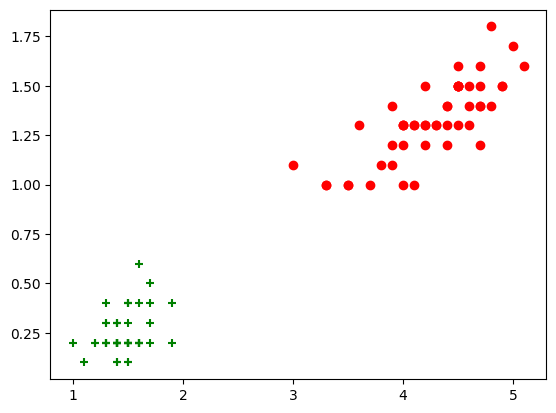

In [ ]:
plt.scatter(data0['petal length (cm)'], data0['petal width (cm)'], c='g', marker='+')
plt.scatter(data1['petal length (cm)'], data1['petal width (cm)'], c='r', marker='o')

In [ ]:
x = data.drop(['target', 'flower_name'], axis='columns')
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = data.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       1, 0, 0, 2, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(acc)
cm = confusion_matrix(y_test, y_pred)
cm

0.9666666666666667


array([[12,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  8]])

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
data.drop(['flower_name'], axis='columns',inplace=True)

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


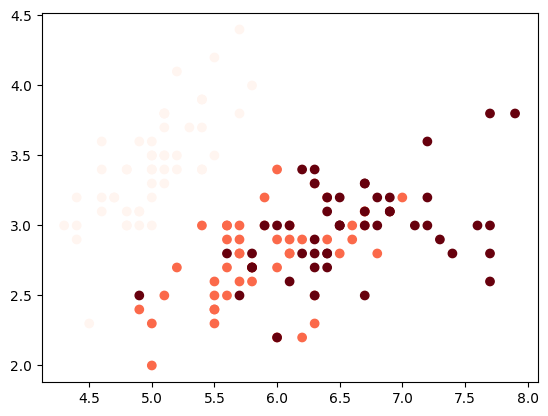

In [ ]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['target'], cmap='Reds')


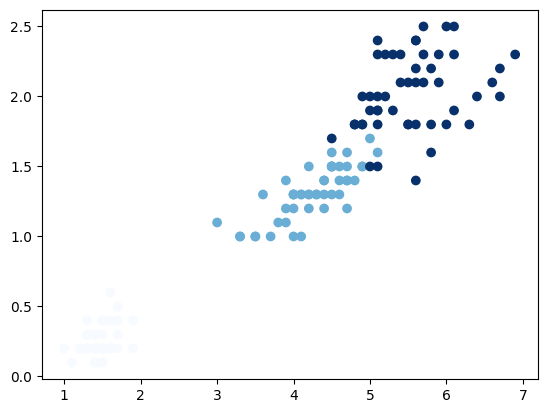

In [ ]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c=data.target, cmap='Blues')

In [ ]:
model.predict([[3,4,4,0]])

C:\Users\taj\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

####

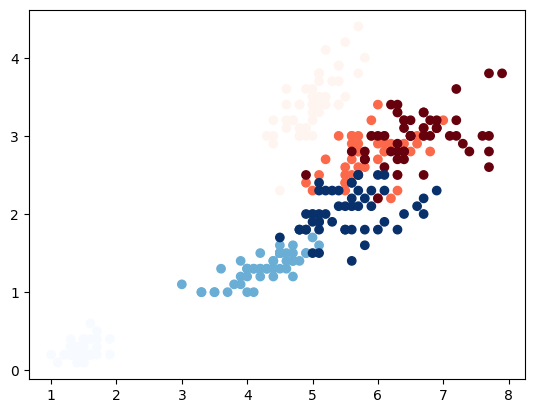

In [ ]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['target'], cmap='Reds')
plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c=data.target, cmap='Blues')

In [ ]:
model_reg0 = SVC(C=0.1)


In [ ]:
model_reg0.fit(x_train, y_train)

,C,0.1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
model_reg0.score(x_test, y_test)

0.9666666666666667

In [ ]:
model.score(x_test, y_test)

0.9666666666666667

In [ ]:
#gamma

In [ ]:
model_gamma0 = SVC(gamma=1)
model_gamma0.fit(x_train, y_train)
model_gamma0.score(x_test, y_test)
# Ans = 0.966666666667
model_gamma1 = SVC(gamma=100)
model_gamma1.fit(x_train, y_train)
model_gamma1.score(x_test, y_test)
#Ans = 0.5333333333333333
# Conclusion : Gamma should not be much high as it can cause overfitting

0.5333333333333333

In [ ]:
#Kernel

In [ ]:
model_kernel0 = SVC(kernel='linear')
model_kernel0.fit(x_train, y_train)
model_kernel0.score(x_test, y_test)

0.9666666666666667

In [ ]:
model_kernel1 = SVC(kernel='rbf')
model_kernel1.fit(x_train, y_train)
model_kernel1.score(x_test, y_test)

0.9666666666666667

In [ ]:
model_kernel2 = SVC(kernel='sigmoid')
model_kernel2.fit(x_train, y_train)
model_kernel2.score(x_test, y_test)

0.26666666666666666

In [ ]:
# Decision Boundary for petal length and width feature

In [ ]:
X = iris.data[:, [2,3]]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [ ]:
y=data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
X = X[y != 2]
y = y[y != 2]

In [ ]:
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# Creating meshgrid
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

In [ ]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

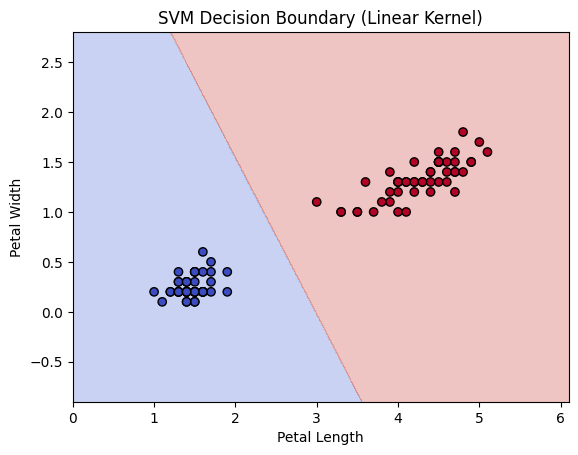

In [ ]:
# ploting
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.show()

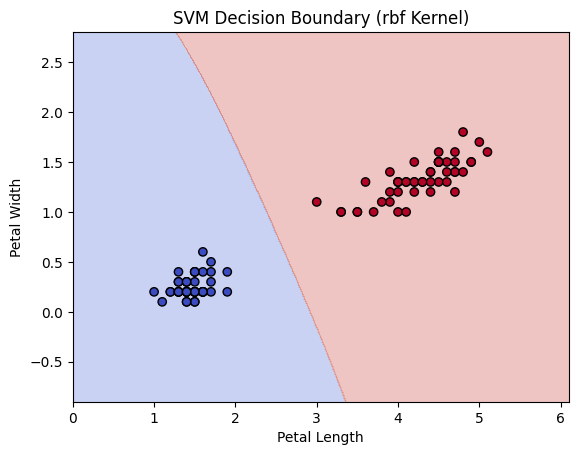

In [ ]:
clf = SVC(kernel='rbf', C=1)
clf.fit(X, y)
# Creating meshgrid
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# ploting
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary (rbf Kernel)')
plt.show()

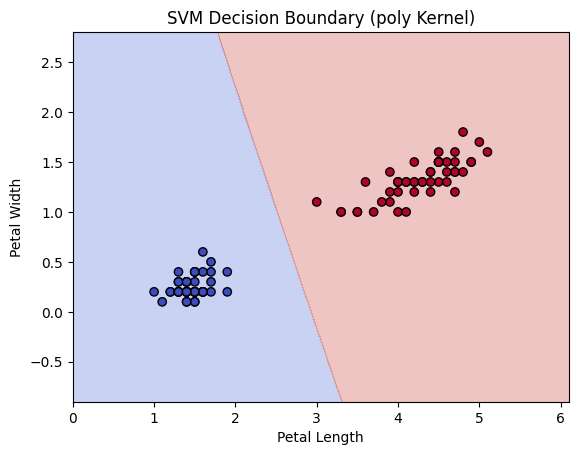

In [ ]:
clf = SVC(kernel='poly', C=1)
clf.fit(X, y)
# Creating meshgrid
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# ploting
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary (poly Kernel)')
plt.show()

In [ ]:
clf = SVC(kernel='sigmoid', C=1)
clf.fit(X, y)
# Creating meshgrid
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# ploting
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary (sigmoid Kernel)')
plt.show()